# Supervised Learning

Activity: Building a Student Intervention System

Dataset: 'student-data.csv'


### Question 1 - Classification vs. Regression


Your goal for this project is to identify students who might need early intervention before they fail or pass. 
Which type of supervised learning problem is this, classification or regression? Why?

In [4]:
# Solution - This is an example of 'Classification' kind of Supervised learning. 
    # Because here we are trying to find out students who pass/fail ,that is discrete values . Not continuous values. -->

### Question-2


Load necessary Python libraries and load the student data. Note that the last column from this dataset, 'passed', will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [52]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('student-data.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


We can see that there are 395 rows and 31 columns in the raw data set

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [21]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [15]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


insights

-> 13 features are of integer data types, while 18 are float.

-> Average age of students is approximately 17

-> Students with age 15 to 22 can be seen

-> Each student studies has atleast 1hour of traveltime, studytime and freetime and hanging out with friends

-> There are students having severe level of alcohol consumption (rating of 5 out of 5)

-> No missing values are found

### Question-3


Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:

The total number of students, n_students.

The total number of features for each student, n_features.

The number of those students who passed, n_passed.

The number of those students who failed, n_failed.

The graduation rate of the class, grad_rate, in percent (%).

In [24]:
# The total number of students

n_students = df.shape[0]
n_students

395

In [25]:
# The total number of features for each student

n_features = df.shape[1]
n_features

31

In [26]:
# The number of those students who passed

passed = df.groupby('passed')['passed'].count()
n_passed = passed[1]
n_passed

265

In [27]:
# The number of those students who failed

n_failed = n_students - n_passed
n_failed

130

In [28]:
# The graduation rate of the class

grad_rate = (n_passed/n_students)*100
grad_rate

67.08860759493672

insights

- > Total number of students : 395

- > Total number of features : 31

- > Total number of passed students : 265

- > Total number of Failed students : 130

- > Graduation rate of the class : 67.08860759493672

In [ ]:
# Preparing the Data
# you will prepare the data for modeling, training and testing.

### Question-4

Identify feature and target columns
separate the student data into feature and target columns to see if any features are non-numeric.

In [30]:
# Passed is the target column, we drop that and prints the remaining features

df.drop('passed', axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,5,4,4,5,4,11
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,3
392,MS,M,21,R,GT3,T,1,1,other,other,...,yes,no,no,5,5,3,3,3,3,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,4,1,3,4,5,0


In [32]:
# 'passed' column

df['passed']

0       no
1       no
2      yes
3      yes
4      yes
      ... 
390     no
391    yes
392     no
393    yes
394     no
Name: passed, Length: 395, dtype: object

In [35]:
# separating the student data into feature and target columns

x = df.drop('passed', axis=1)
y = df['passed']

In [45]:
y = pd.DataFrame(df['passed'])

### Question-5 Preprocess Feature Columns


As you can see, there are several non-numeric columns that need to be converted! Many of them are simply yes/no, e.g. internet. These can be reasonably converted into 1/0 (binary) values.

Other columns, like Mjob and Fjob, have more than two values, and are known as categorical variables. The recommended way to handle such a column is to create as many columns as possible values (e.g. Fjob_teacher, Fjob_other, Fjob_services, etc.), and assign a 1 to one of them and 0 to all others.

These generated columns are sometimes called dummy variables, and we will use the pandas.get_dummies() function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [46]:
# One hot encoding
# Generating dummy variables
x = pd.get_dummies(x)
x

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,1,0,0,1,0,1,1,0,1,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,1,0,0,1,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,1,0,1,0,0,1,1,0,1,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,1,0,0,1,0,1,1,0


In [48]:
# Label encoding - fail : 0, pass: 1

from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
a=['passed']
for i in np.arange(len(a)):
    y[a[i]]=label_en.fit_transform(y[a[i]])
print(y)

     passed
0         0
1         0
2         1
3         1
4         1
..      ...
390       0
391       1
392       0
393       1
394       0

[395 rows x 1 columns]


In [50]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [55]:
# Normalizing the data using min-max scaling

In [57]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
Xmm = min_max.fit_transform(x)
Xmm = pd.DataFrame(x)
Xmm.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,...,0.491139,0.508861,0.205063,0.794937,0.050633,0.949367,0.167089,0.832911,0.665823,0.334177
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,...,0.500555,0.500555,0.404260,0.404260,0.219525,0.219525,0.373528,0.373528,0.472300,0.472300
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Question - 6 Implementation: Training and Testing Data Split


So far, we have converted all categorical features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:

Randomly shuffle and split the data (X, y) into training and testing subsets.
Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
Set a random_state for the function(s) you use, if provided.
Store the results in X_train, X_test, y_train, and y_test.

In [60]:
# Splitting the dataset in to train and validation set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=20, test_size=0.25)

In [61]:
# # Show the results of the split

print('x_train :',x_train.shape)
print('y_train :',y_train.shape)
print('x_test :',x_test.shape)
print('y_test :',y_test.shape)

x_train : (296, 56)
y_train : (296, 1)
x_test : (99, 56)
y_test : (99, 1)


### Question - 7 Training and Evaluating Models


In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in scikit-learn. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

First of all, selection of models(classifiers) to be utilized will depend upon whether the given data set is linear or non-linear.
In this dataset we have 30 feature columns.
The outcome predictions may be correlated to some features while some other features may not have any impact on the target variable.
Since this is a binary classification problem, we can choose:

Gradient Boosting
Gradient boosting algorithm can be used for predicting not only continuous target variable (Regressor) but also categorical target variable (Classifier). When it is used as a regressor, the cost function is Mean Square Error (MSE) and when it is used as a classifier then the cost function is Log loss.
In Gradient Boosting, each predictor tries to improve on its predecessor by reducing the errors. Instead of fitting a predictor on the data at each iteration, it actually fits a new predictor to the residual errors made by the previous predictor.

Support Vector Machine
Support Vector Machine(SVM) is a supervised machine learning algorithm used for both classification and regression. SVM is mostly used in binary classification.
SVM divides dataset to classes and constructs a boundary hyperplane to separate different classes.

Random Forest Classifier
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.
For classification tasks, the output of the random forest is the class selected by most trees. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then it collects the votes from different decision trees to decide the final prediction.
Applies majority voting for classification problems.

### Model Application

List three supervised learning models that are appropriate for this problem. 

What are the general applications of each model? 

What are their strengths and weaknesses? 

Given what you know about the data, why did you choose these models to be applied?

Gradient Boosting:
It works well on small data, data with subgroups, big data, and complicated data. It doesn’t work so well on sparse data. Moreover, dispersed data can create some issues for this classifier. However, we can apply this model because it tends to do better than most supervised learning algorithms on these types of data problems.
Applications: Ranking of commercial web search engines, High Energy Physics, Deep Neural Networks

Support Vector Machine:
SVM can be used when there is a clear margin of separation, and on medium-sized datasets.
However, doesn't work well when the classes are overlaping, or when there is a large dataset and the algorithm tends to be very slow.
We can apply this model because it's a small dataset of only 395 records.
The model can be slow to train, however it shouldn't matter because we probably want to run the model periodically and not in real-time.
Applications: Face detection, Text and hypertext categorization, Handwriting recognition, Bioinformatics, Classification of images

Random Forest Classifier:
Random Forest Classifier can easily handle categorical variables that do not expect features that interact linearly.
The model also handles high dimensional spaces very well. The model also works well for large numbers of training samples. It's less likely to overfit than a decision tree.
However, it's more difficult to interpret a Random Forest than a Decision Tree.
We should apply this model because it's easy to use, handles categorical variables very well, and do not overfit like decision trees.
Applications: HR recruitment(cumulative scores), Banking, Credit ratings, Medical diagnosis, Stockmarket, e-commerce

In [62]:
# Import the three supervised learning models from sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [63]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [64]:
y_pred = gb.predict(x_test)

In [65]:
from sklearn import metrics
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
print('The accuracy of GradientBoosting Classifier is: ', accuracy_score(y_test, y_pred))
print('f1 score is: ',f1_score(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)

The accuracy of GradientBoosting Classifier is:  0.7474747474747475
f1 score is:  0.8322147651006712


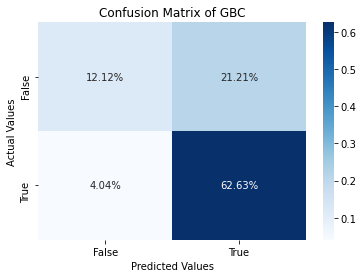

In [66]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix of GBC');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [67]:
#select the svm algorithm
svm = svm.SVC(kernel='rbf',C=30,gamma='auto')

#we train the algorithm with training data and training output
svm.fit(x_train, y_train)

#we pass the testing data to the stored algorithm to predict the outcome
y_pred = svm.predict(x_test)

#we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output
print('The accuracy of the SVM is: ', accuracy_score(y_test, y_pred))
print('f1 score is: ',f1_score(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)

The accuracy of the SVM is:  0.6262626262626263
f1 score is:  0.7375886524822695


In [68]:
#Random forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print('The accuracy of Random Forest Classifier is: ', accuracy_score(y_test, y_pred))
print('f1 score is: ',f1_score(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)


The accuracy of Random Forest Classifier is:  0.7070707070707071
f1 score is:  0.8176100628930818


In [74]:
# hyperparameter tuning

In [69]:
from sklearn.model_selection import GridSearchCV
model_params = {
     'GradientBoostingClassifier' : {
        'model' : GradientBoostingClassifier(),
        'params' : {
            'n_estimators': [5,20,50],
            'min_samples_leaf': [5,10,25],
            'criterion': ['squared_error', 'mse', 'mae']
        }
     },
    'SVM' : {
        'model' : SVC(gamma='auto'),
        'params' : {
            'C' : [1,10,20],
            'kernel' : ['rbf', 'linear']
        }
    },
    'Random_Forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1,25,50]
        }   
    }
}

In [70]:
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

In [71]:
#cross validation results
data = pd.DataFrame(clf.cv_results_)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018752,0.006254,0.006252,0.007657,1,{'n_estimators': 1},0.583333,0.677966,0.610169,0.525424,0.525424,0.584463,0.057230,3
1,0.075024,0.018230,0.009377,0.007656,25,{'n_estimators': 25},0.716667,0.711864,0.610169,0.661017,0.644068,0.668757,0.040634,1
2,0.109398,0.009880,0.012507,0.006254,50,{'n_estimators': 50},0.700000,0.661017,0.593220,0.627119,0.644068,0.645085,0.035449,2


In [73]:
data = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
data = data.style.set_properties(subset=['best_params'])
data

,model,best_score,best_params
0,GradientBoostingClassifier,0.712768,"{'criterion': 'mse', 'min_samples_leaf': 25, 'n_estimators': 20}"
1,SVM,0.702655,"{'C': 1, 'kernel': 'rbf'}"
2,Random_Forest,0.668757,{'n_estimators': 25}


In [76]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x,y)
print(etc.feature_importances_)

[0.03469276 0.03401911 0.02510986 0.02025704 0.03129697 0.07141612
 0.02791173 0.02690441 0.03630415 0.02190797 0.02760428 0.02665337
 0.04024384 0.00893914 0.009011   0.0164825  0.01606743 0.01381211
 0.01412043 0.01288386 0.01334943 0.00934401 0.00816605 0.01382158
 0.00982541 0.01607869 0.01697019 0.01157146 0.0098896  0.00579356
 0.01823921 0.01404177 0.00645762 0.0178941  0.01477547 0.00911337
 0.01534808 0.01367318 0.01619534 0.01590836 0.01455123 0.01438888
 0.01438505 0.01541995 0.01636625 0.01416537 0.01923545 0.0187873
 0.01504963 0.0119058  0.01023794 0.0101659  0.01147779 0.01337507
 0.01440543 0.0139884 ]


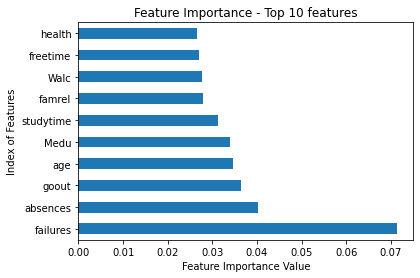

In [79]:
# Feature Importance - Top 10 features

feature_imp = pd.Series(etc.feature_importances_, index=x.columns)
feature_imp.nlargest(10).plot(kind='barh')
plt.ylabel('Index of Features')
plt.xlabel('Feature Importance Value')
plt.title('Feature Importance - Top 10 features')
plt.show()

In [80]:
#assigning important features to variable X1
X1 = x[['Medu','age', 'goout', 'absences', 'failures']]
X1

,Medu,age,goout,absences,failures
0,4,18,4,6,0
1,1,17,3,4,0
2,1,15,2,10,3
3,4,15,2,2,0
4,3,16,2,4,0
...,...,...,...,...,...
390,2,20,4,11,2
391,3,17,5,3,0
392,1,21,3,3,3
393,3,18,1,0,0


In [81]:
#Training & Testing Random Forest Classifier model after dropping some features
x_train, x_test, y_train, y_test = train_test_split(X1, y, random_state=20, test_size=0.25)
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print('The accuracy of Random Forest Classifier is: ', accuracy_score(y_test, y_pred))
print('f1 score is: ',f1_score(y_test, y_pred))

The accuracy of Random Forest Classifier is:  0.6666666666666666
f1 score is:  0.7724137931034484


In [82]:
#making a prediction
make_predict = [[4,15,2,2,0]]
r = rf.predict(make_predict).item()
if r == 0:
    print('Predicted result is Fail: Student needs Intervention');
else:
    print('Predicted result is Pass')

Predicted result is Pass


Insights

Even after performing so many processing and training stages accuracy is not seen to be improved, could've added more features.